<a href="https://colab.research.google.com/github/madisonhgallagher/project_chd/blob/main/DecisionTrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! git clone https://github.com/madisonhgallagher/project_chd

fatal: destination path 'project_chd' already exists and is not an empty directory.


Accuracy: 0.7705696202531646

Confusion Matrix:
 [[464  81]
 [ 64  23]]


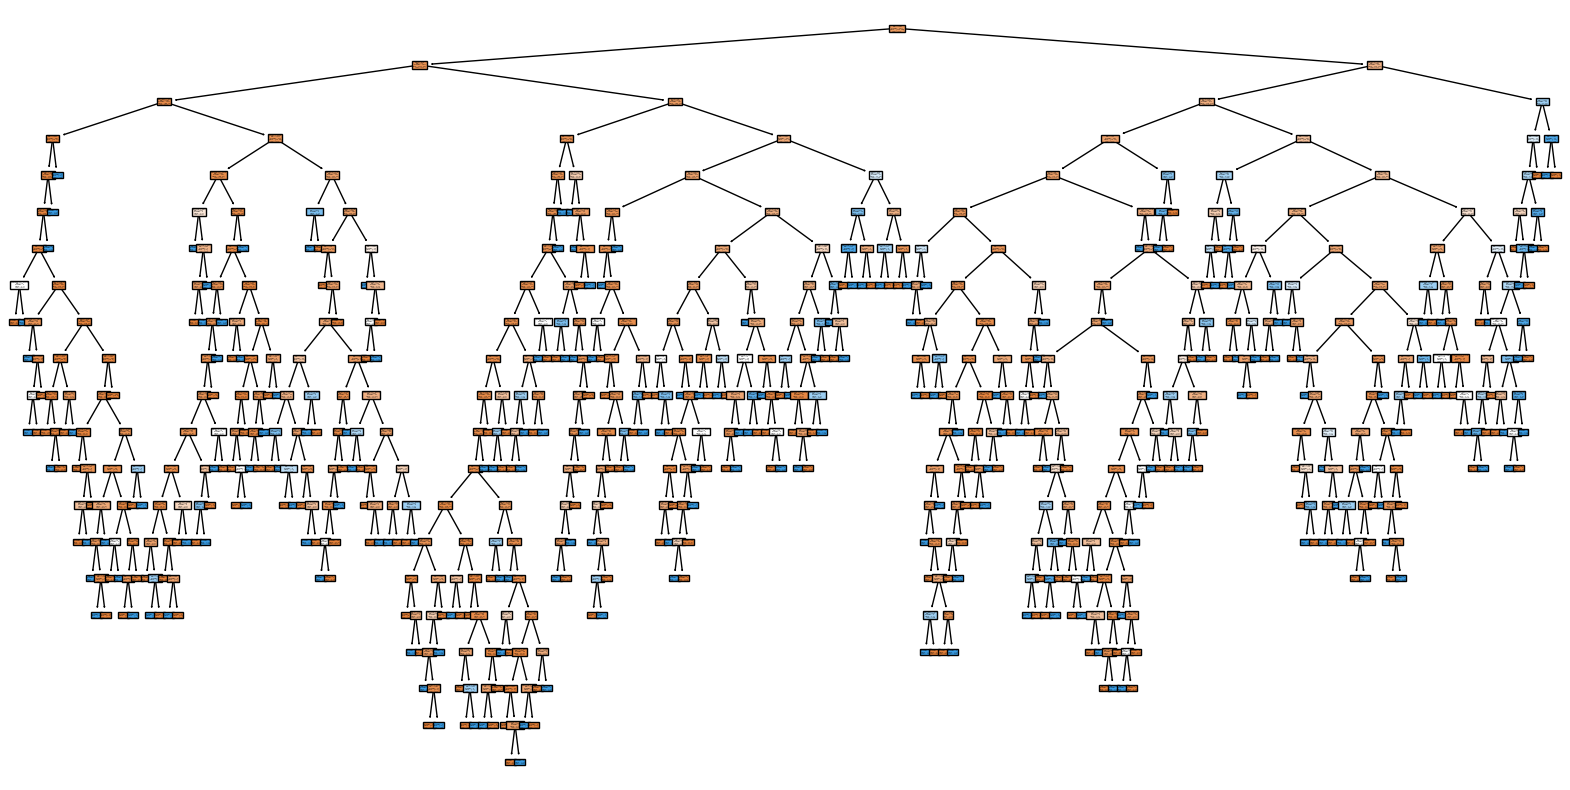

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('/content/project_chd/clean_train.csv', index_col=0)

# Process data
y = df['TenYearCHD']
X = df.drop(['TenYearCHD'], axis=1)

# Split the sample into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=104)

# Fit the model
cart = DecisionTreeClassifier()
cart.fit(X_train, y_train)

# Make predictions on the test set
y_hat = cart.predict(X_test)

# Compute the confusion matrix
tab = confusion_matrix(y_test, y_hat)
acc = np.diag(tab).sum() / tab.sum()
print('Accuracy:', acc)
print('\nConfusion Matrix:\n', tab)

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(cart, filled=True, feature_names=X.columns, class_names=["False", "True"])
plt.show()


The accuracy of the tree is %77.

Now computing regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor # Import the tree classifier
from sklearn.tree import plot_tree # Import the tree classifier
from sklearn.model_selection import train_test_split # Train/test splitter

df = pd.read_csv('/content/project_chd/clean_train.csv') # Load clean train data
df.head()

,Unnamed: 0.1,Unnamed: 0,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,...,prevalentStroke_NA,prevalentHyp_NA,diabetes_NA,totChol_NA,sysBP_NA,diaBP_NA,BMI_NA,heartRate_NA,glucose_NA,TenYearCHD_NA
0,0,1267,1,58,1.0,0,0.0,0.0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,1,1209,0,40,1.0,1,15.0,0.0,0,0,...,False,False,False,False,False,False,False,False,False,False
2,2,2050,0,52,1.0,0,0.0,0.0,0,0,...,False,False,False,False,False,False,False,False,False,False
3,3,1183,1,38,2.0,1,43.0,0.0,0,1,...,False,False,False,False,False,False,False,False,False,False
4,4,3225,0,43,1.0,0,0.0,0.0,0,0,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.drop(columns=['sex_NA', 'age_NA', 'education_NA', 'currentSmoker_NA',
                         'cigsPerDay_NA', 'BPMeds_NA', 'prevalentStroke_NA',
                         'prevalentHyp_NA', 'diabetes_NA', 'totChol_NA',
                         'sysBP_NA', 'diaBP_NA', 'BMI_NA', 'heartRate_NA',
                         'glucose_NA', 'TenYearCHD_NA'], inplace=True) # drop the columns filled with all Fa;s

In [ ]:
df.head()

,Unnamed: 0.1,Unnamed: 0,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,1267,1,58,1.0,0,0.0,0.0,0,0,0,220.0,143.0,104.0,29.85,75,87.000000,1
1,1,1209,0,40,1.0,1,15.0,0.0,0,0,0,199.0,122.0,82.0,22.16,85,77.000000,0
2,2,2050,0,52,1.0,0,0.0,0.0,0,0,0,275.0,112.0,71.0,25.68,80,81.818783,0
3,3,1183,1,38,2.0,1,43.0,0.0,0,1,0,170.0,130.0,94.0,23.90,110,75.000000,0
4,4,3225,0,43,1.0,0,0.0,0.0,0,0,0,202.0,124.0,92.0,21.26,75,74.000000,0


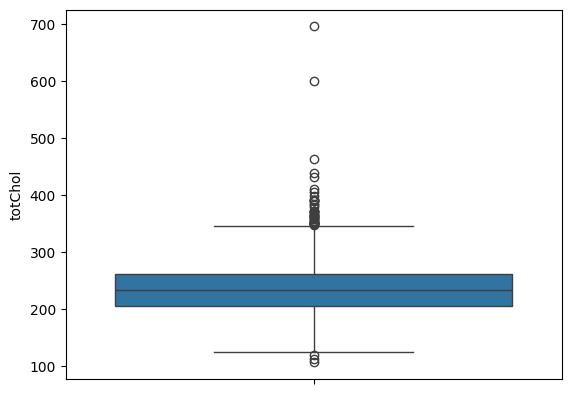

<Axes: ylabel='totChol'>

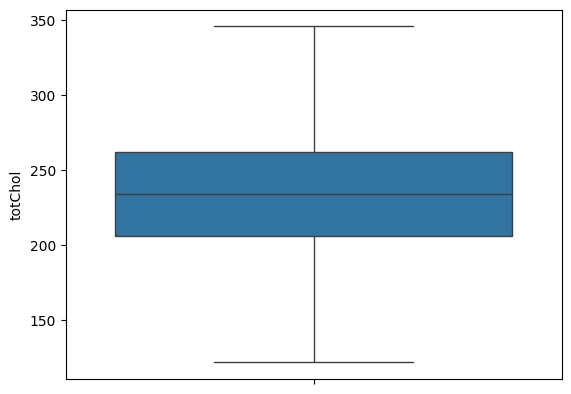

In [ ]:
sns.boxplot(df['totChol'])
plt.show()

def winsorize(x):
    # Convert from pd to np, if necessary:
    if type(x) == 'pandas.core.series.Series':
        x = x.to_numpy()
    # Compute IQR and 25, 75 quantiles:
    pct25, pct75 = np.percentile(x,[25,75])
    iqr = pct75 - pct25
    # Compute whiskers:
    lower_whisker = pct25 - iqr*1.5
    upper_whisker = pct75 + iqr*1.5
    # Windorize x:
    x_winsor = np.copy(x)
    x_winsor[ x < lower_whisker ] = lower_whisker
    x_winsor[ x > upper_whisker ] = upper_whisker
    return(x_winsor)

df['totChol'] = winsorize(df['totChol']) # Winsorize x?

#qnt = np.quantile(df['Price'],.975)
#df = df.loc[ df['Price'] < qnt,: ]

sns.boxplot(df['totChol'])

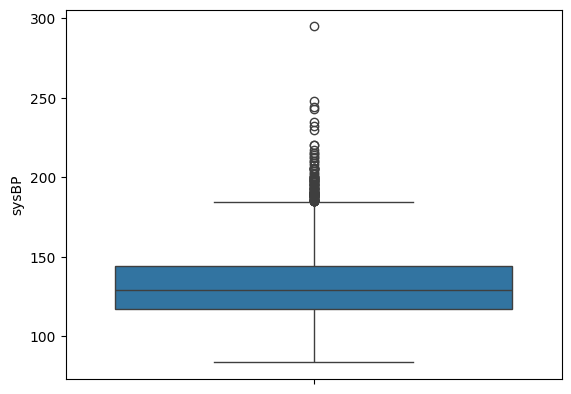

<Axes: ylabel='sysBP'>

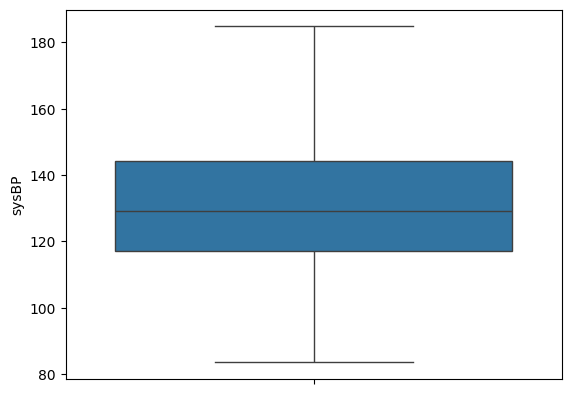

In [ ]:
sns.boxplot(df['sysBP'])
plt.show()

def winsorize(x):
    # Convert from pd to np, if necessary:
    if type(x) == 'pandas.core.series.Series':
        x = x.to_numpy()
    # Compute IQR and 25, 75 quantiles:
    pct25, pct75 = np.percentile(x,[25,75])
    iqr = pct75 - pct25
    # Compute whiskers:
    lower_whisker = pct25 - iqr*1.5
    upper_whisker = pct75 + iqr*1.5
    # Windorize x:
    x_winsor = np.copy(x)
    x_winsor[ x < lower_whisker ] = lower_whisker
    x_winsor[ x > upper_whisker ] = upper_whisker
    return(x_winsor)

df['sysBP'] = winsorize(df['sysBP']) # Winsorize x?

#qnt = np.quantile(df['Price'],.975)
#df = df.loc[ df['Price'] < qnt,: ]

sns.boxplot(df['sysBP'])

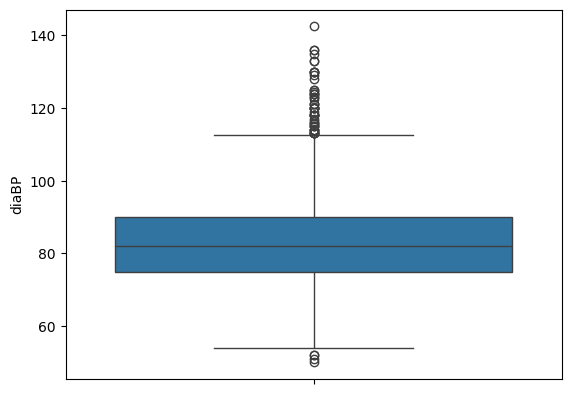

<Axes: ylabel='diaBP'>

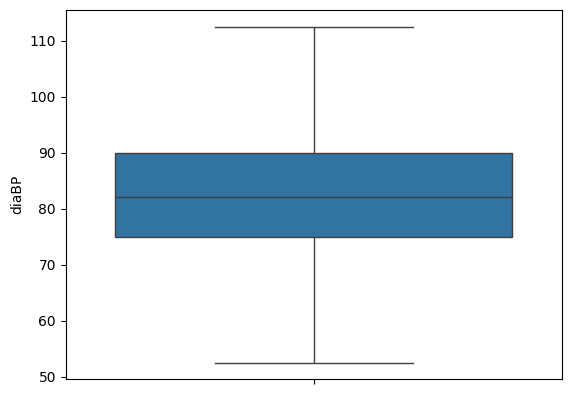

In [ ]:
sns.boxplot(df['diaBP'])
plt.show()

def winsorize(x):
    # Convert from pd to np, if necessary:
    if type(x) == 'pandas.core.series.Series':
        x = x.to_numpy()
    # Compute IQR and 25, 75 quantiles:
    pct25, pct75 = np.percentile(x,[25,75])
    iqr = pct75 - pct25
    # Compute whiskers:
    lower_whisker = pct25 - iqr*1.5
    upper_whisker = pct75 + iqr*1.5
    # Windorize x:
    x_winsor = np.copy(x)
    x_winsor[ x < lower_whisker ] = lower_whisker
    x_winsor[ x > upper_whisker ] = upper_whisker
    return(x_winsor)

df['diaBP'] = winsorize(df['diaBP']) # Winsorize x?

#qnt = np.quantile(df['Price'],.975)
#df = df.loc[ df['Price'] < qnt,: ]

sns.boxplot(df['diaBP'])

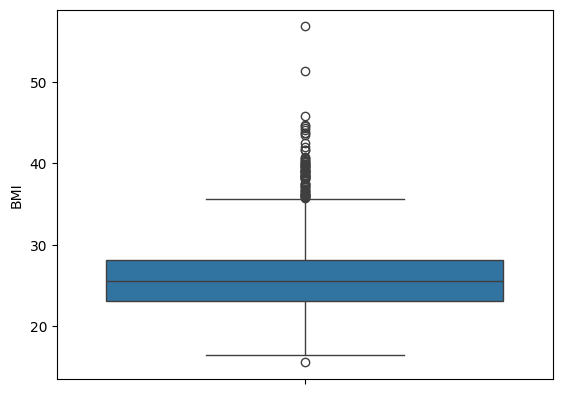

<Axes: ylabel='BMI'>

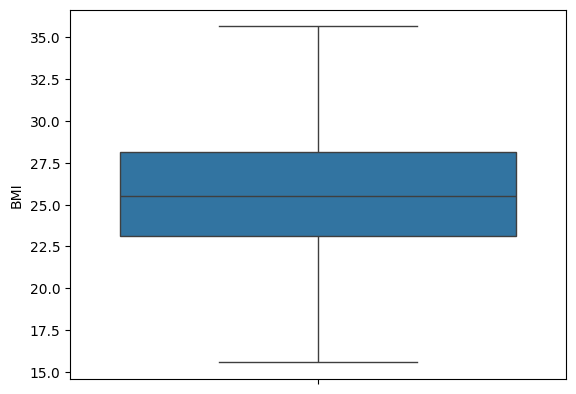

In [ ]:
sns.boxplot(df['BMI'])
plt.show()

def winsorize(x):
    # Convert from pd to np, if necessary:
    if type(x) == 'pandas.core.series.Series':
        x = x.to_numpy()
    # Compute IQR and 25, 75 quantiles:
    pct25, pct75 = np.percentile(x,[25,75])
    iqr = pct75 - pct25
    # Compute whiskers:
    lower_whisker = pct25 - iqr*1.5
    upper_whisker = pct75 + iqr*1.5
    # Windorize x:
    x_winsor = np.copy(x)
    x_winsor[ x < lower_whisker ] = lower_whisker
    x_winsor[ x > upper_whisker ] = upper_whisker
    return(x_winsor)

df['BMI'] = winsorize(df['BMI']) # Winsorize x?

#qnt = np.quantile(df['Price'],.975)
#df = df.loc[ df['Price'] < qnt,: ]

sns.boxplot(df['BMI'])

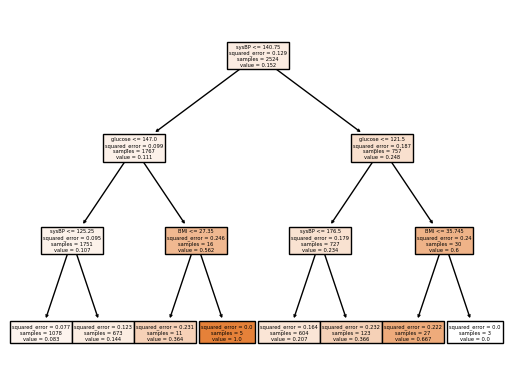

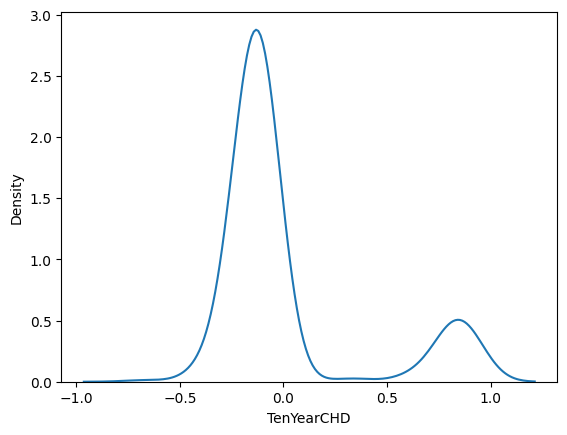

Rsq:  0.0390283508749949
RMSE:  0.35928682537979667


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split

# Read the CSV file
df = pd.read_csv('/content/project_chd/clean_train.csv')

# Process data
y = df['TenYearCHD']
vars = ['totChol', 'BMI','cigsPerDay','sysBP','diaBP','heartRate','glucose']
X = df[vars]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Fit decision tree
cart = DecisionTreeRegressor(max_depth=3)  # Create a regression object
cart.fit(X_train, y_train)  # Fit the regression

# Get feature names
var_names = list(X_train.columns)

# Visualize results
plot_tree(cart, filled=True, feature_names=var_names)
plt.show()

# Make Predictions on the Test Set
y_hat = cart.predict(X_test)

# Residuals, Rsq, RMSE
e = y_test - y_hat
sns.kdeplot(e)  # Notice the residuals aren't centered around zero
plt.show()

rsq = 1 - np.sum(e**2) / np.sum((y_test - np.mean(y_train))**2)
RMSE = np.sqrt(np.mean(e**2))

print('Rsq: ', rsq)
print('RMSE: ', RMSE)


R-squared of 0.039, that is very low


In the context of predicting the 10-year risk of coronary heart disease (CHD), an R-squared value of 0.039 implies that the decision tree regression model based on the selected predictors (such as total cholesterol, BMI, smoking habits, blood pressure, heart rate, and glucose level) has limited ability to explain the variation in CHD risk among individuals in the dataset. This suggests that the relationships between the chosen predictors and the development of CHD are relatively weak or complex, making it challenging for the model to accurately capture and predict CHD risk based solely on these variables. It indicates that factors beyond those included in the model, such as genetic predisposition, lifestyle factors, environmental influences, or other medical conditions, may play significant roles in determining an individual's risk of developing CHD. Therefore, while the model may provide some insight into potential risk factors for CHD, its predictive capacity is modest, highlighting the need for further exploration and consideration of additional variables or more sophisticated modeling approaches to improve prediction accuracy.